In [18]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import math
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv("/Users/juhong/Library/CloudStorage/OneDrive-아주대학교/대학교/3학년 2학기/캡스톤/DUI-traffic-stop-recommendation/bar_list.csv",encoding="CP949")

In [7]:
df.head()

,Unnamed: 0,지번주소,도로명주소,사업장명,위도,경도
0,0,서울특별시 강남구 신사동 525-13 지상1층101102호,서울특별시 강남구 압구정로4길 13-13 (신사동지상1층101102호),르포트 13,37.522346,127.018259
1,1,서울특별시 강남구 삼성동 150-21번지 지상1층,서울특별시 강남구 삼성로104길 7 (삼성동지상1층),한탕,37.510909,127.052322
2,2,서울특별시 강남구 논현동 242-21 삼아프라자,서울특별시 강남구 선릉로129길 3-6 삼아프라자 1층 101호 (논현동),묵호일식,37.515947,127.038082
3,3,서울특별시 강남구 청담동 95-15번지 지상2층,서울특별시 강남구 압구정로72길 22 지상2층 (청담동),볼트스테이크하우스(Vault steak house),37.525020,127.042083
4,4,서울특별시 강남구 역삼동 817-21 지상1층,서울특별시 강남구 강남대로96길 17 (역삼동지상1층),용용선생 강남역점,37.500139,127.025509


In [13]:
points = df[['위도','경도']]

In [16]:
points.head()

,x,y
0,37.522346,127.018259
1,37.510909,127.052322
2,37.515947,127.038082
3,37.525020,127.042083
4,37.500139,127.025509


In [15]:
points.columns = ["x","y"]

In [ ]:
sns.set_palette("Set2")

<AxesSubplot:xlabel='x', ylabel='y'>

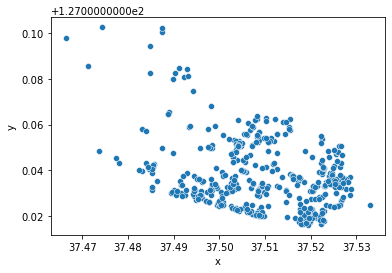

In [17]:
sns.scatterplot(x="x",y="y",data=points,palette="Set2")

In [22]:
#inf로 된 결측치 제거 3개
points.replace([np.inf],np.nan,inplace=True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_6474/1620305212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.replace([np.inf],np.nan,inplace=True)


In [30]:
points.dropna(subset=["x","y"],how="all",inplace = True)

/var/folders/d2/20dks6yj46b_077x0h5fmr740000gn/T/ipykernel_6474/292313200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points.dropna(subset=["x","y"],how="all",inplace = True)


In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)

KMeans(n_clusters=5)

In [34]:
result_by_sklearn = points.copy()
result_by_sklearn["cluster"] = kmeans.labels_
result_by_sklearn.head()

,x,y,cluster
0,37.522346,127.018259,2
1,37.510909,127.052322,3
2,37.515947,127.038082,0
3,37.525020,127.042083,0
4,37.500139,127.025509,1


<AxesSubplot:xlabel='x', ylabel='y'>

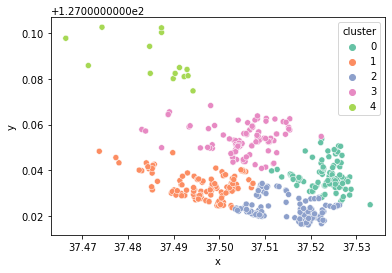

In [36]:
sns.scatterplot(x="x",y="y",hue="cluster",data=result_by_sklearn,palette="Set2")